In [ ]:
import tensorflow.compat.v2 as tf #
from typing import Union
from tensorflow.keras.layers import * 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import keras
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tf.enable_v2_behavior()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir(r'/content/drive/My Drive/mhist_dataset')  # Change the directory to the project folder in your drive

#Import dataset


In [ ]:
image_table=pd.read_csv('annotations.csv') #make sure this is pointing to the csv location

In [ ]:
train_set=image_table.loc[image_table['Partition'] == 'train']
print(train_set.shape)

(2175, 4)


In [ ]:
test_set=image_table.loc[image_table['Partition'] == 'test']
print(test_set.shape)

(977, 4)


In [ ]:
image_dir = '/content/drive/My Drive/mhist_dataset/images'  #you should change to your directory 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
shear_range=0.1,
rotation_range=15,
horizontal_flip=True,
vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_set,
directory=image_dir,
x_col="Image Name",
y_col="Majority Vote Label",
batch_size=32,
seed=42,
shuffle=True,
interpolation='bilinear',
class_mode="categorical",
target_size=(224, 224))

Found 2175 validated image filenames belonging to 2 classes.


In [ ]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_set,
directory=image_dir,
x_col="Image Name",
y_col="Majority Vote Label",
seed=42,
class_mode='categorical',
interpolation='bilinear',
target_size=(224, 224),
batch_size=32,
shuffle=False)

Found 977 validated image filenames belonging to 2 classes.


#Create models

In [ ]:
#download resnet
resnet=tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
)

In [ ]:
#making select layers trainable
count=0
for layers in resnet.layers:
  count+=1
  if count== 191:
    continue
  if(layers.name[0:5]== 'conv5' or layers.name[0:5]== 'post_'):
    continue
  else:
    layers.trainable=False
print(count)

191


In [ ]:
#checking the layers
count=0
for layers in resnet.layers:
  count+=1
  print(layers.trainable, layers.name[0:5], count)
  

False input 1
False conv1 2
False conv1 3
False pool1 4
False pool1 5
False conv2 6
False conv2 7
False conv2 8
False conv2 9
False conv2 10
False conv2 11
False conv2 12
False conv2 13
False conv2 14
False conv2 15
False conv2 16
False conv2 17
False conv2 18
False conv2 19
False conv2 20
False conv2 21
False conv2 22
False conv2 23
False conv2 24
False conv2 25
False conv2 26
False conv2 27
False conv2 28
False conv2 29
False conv2 30
False conv2 31
False conv2 32
False conv2 33
False conv2 34
False conv2 35
False conv2 36
False conv2 37
False max_p 38
False conv2 39
False conv2 40
False conv3 41
False conv3 42
False conv3 43
False conv3 44
False conv3 45
False conv3 46
False conv3 47
False conv3 48
False conv3 49
False conv3 50
False conv3 51
False conv3 52
False conv3 53
False conv3 54
False conv3 55
False conv3 56
False conv3 57
False conv3 58
False conv3 59
False conv3 60
False conv3 61
False conv3 62
False conv3 63
False conv3 64
False conv3 65
False conv3 66
False conv3 67
Fals

In [ ]:
#final teacher model
teacher_res=tf.keras.Sequential([resnet,Dense(units=2, activation='linear')])

In [ ]:
teacher_res.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_3 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 14,974,978
Non-trainable params: 8,593,920
_________________________________________________________________


In [ ]:
#download mobilenet
mobilenet=tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    alpha=1.0,
    weights="imagenet",
    input_tensor=None,
    pooling='max',
)

In [ ]:
#making select layers trainable
count=0
for layers in mobilenet.layers:
  count+=1
  if count> 151:
    continue
  if(layers.name[0:8]== 'block_16' ):
    continue
  else:
    layers.trainable=False
print(count)

155


In [ ]:
#checking layers
count=0
for layers in mobilenet.layers:
  print(layers.trainable, layers.name[0:8], count)
  count+=1

False input_5 0
False Conv1 1
False bn_Conv1 2
False Conv1_re 3
False expanded 4
False expanded 5
False expanded 6
False expanded 7
False expanded 8
False block_1_ 9
False block_1_ 10
False block_1_ 11
False block_1_ 12
False block_1_ 13
False block_1_ 14
False block_1_ 15
False block_1_ 16
False block_1_ 17
False block_2_ 18
False block_2_ 19
False block_2_ 20
False block_2_ 21
False block_2_ 22
False block_2_ 23
False block_2_ 24
False block_2_ 25
False block_2_ 26
False block_3_ 27
False block_3_ 28
False block_3_ 29
False block_3_ 30
False block_3_ 31
False block_3_ 32
False block_3_ 33
False block_3_ 34
False block_3_ 35
False block_4_ 36
False block_4_ 37
False block_4_ 38
False block_4_ 39
False block_4_ 40
False block_4_ 41
False block_4_ 42
False block_4_ 43
False block_4_ 44
False block_5_ 45
False block_5_ 46
False block_5_ 47
False block_5_ 48
False block_5_ 49
False block_5_ 50
False block_5_ 51
False block_5_ 52
False block_5_ 53
False block_6_ 54
False block_6_ 55
False 

In [ ]:
#final student model
student_mobile=tf.keras.Sequential([mobilenet,Dense(units=2, activation='linear')])

In [ ]:
#download mobile net again
mobilenet2=tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    alpha=1.0,
    weights="imagenet",
    input_tensor=None,
    pooling='max',
)

In [ ]:
#making salect layers trainable
count=0
for layers in mobilenet2.layers:
  count+=1
  if count> 151:
    continue
  if(layers.name[0:8]== 'block_16' ):
    continue
  else:
    layers.trainable=False
print(count)

155


In [ ]:
#final student without kd
mobilenet_no_kd=tf.keras.Sequential([mobilenet2,Dense(units=2, activation='linear')])

In [ ]:
mobilenet_no_kd.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_5 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 888,642
Non-trainable params: 1,371,904
_________________________________________________________________


#Training functions

In [ ]:
def compute_teacher_loss_res(images, labels):
  """Compute subclass knowledge distillation teacher loss for given images
     and labels.

  Args:
    images: Tensor representing a batch of images.
    labels: Tensor representing a batch of labels.

  Returns:
    Scalar loss Tensor.
  """
  subclass_logits = teacher_res(images, training=True)

  # Compute cross-entropy loss for subclasses.

  # your code start from here for step 3
  
  loss=tf.keras.losses.CategoricalCrossentropy(axis=-1,name='categorical_crossentropy')
  cross_entropy_loss_value = loss(labels,tf.nn.softmax(subclass_logits, axis=-1))


  return cross_entropy_loss_value

In [ ]:
# Hyperparameters for distillation (need to be tuned).
ALPHA = 0.9 # task balance between cross-entropy and distillation loss
DISTILLATION_TEMPERATURE = 8. #temperature hyperparameter

def distillation_loss(teacher_logits: tf.Tensor, student_logits: tf.Tensor,
                      temperature: Union[float, tf.Tensor]):
  """Compute distillation loss.

  This function computes cross entropy between softened logits and softened
  targets. The resulting loss is scaled by the squared temperature so that
  the gradient magnitude remains approximately constant as the temperature is
  changed. For reference, see Hinton et al., 2014, "Distilling the knowledge in
  a neural network."

  Args:
    teacher_logits: A Tensor of logits provided by the teacher.
    student_logits: A Tensor of logits provided by the student, of the same
      shape as `teacher_logits`.
    temperature: Temperature to use for distillation.

  Returns:
    A scalar Tensor containing the distillation loss.
  """
 # your code start from here for step 3
  soft_targets = tf.nn.softmax(teacher_logits/temperature)

  return tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(
          soft_targets, student_logits / temperature)) * temperature ** 2

def compute_student_loss(images, labels, ALPHA=0.8, DISTILLATION_TEMPERATURE=8. ):
  """Compute subclass knowledge distillation student loss for given images
     and labels.

  Args:
    images: Tensor representing a batch of images.
    labels: Tensor representing a batch of labels.

  Returns:
    Scalar loss Tensor.
  """
  student_subclass_logits = student_mobile(images, training=True)

  # Compute subclass distillation loss between student subclass logits and
  # softened teacher subclass targets probabilities.

  # your code start from here for step 3

  teacher_subclass_logits = teacher_res(images, training=False)
  distillation_loss_value =distillation_loss(teacher_subclass_logits,student_subclass_logits, DISTILLATION_TEMPERATURE )

  # Compute cross-entropy loss with hard targets.

  # your code start from here for step 3
  loss=tf.keras.losses.CategoricalCrossentropy(axis=-1,name='categorical_crossentropy')
  cross_entropy_loss_value = loss(labels,tf.nn.softmax(student_subclass_logits, axis=-1))

  return (ALPHA*  distillation_loss_value + (1-ALPHA)* cross_entropy_loss_value) 

In [ ]:
def compute_num_correct(model, images, labels):
  """Compute number of correctly classified images in a batch.

  Args:
    model: Instance of tf.keras.Model.
    images: Tensor representing a batch of images.
    labels: Tensor representing a batch of labels.

  Returns:
    Number of correctly classified images.
  """
  class_logits = model(images, training=False)
  return tf.math.reduce_sum(tf.cast(tf.math.equal(tf.argmax(class_logits, -1), tf.argmax(labels, -1)),tf.float32)), tf.argmax(class_logits, -1), tf.argmax(labels, -1)

In [ ]:
def train_and_evaluate_teacher(model, compute_loss_fn):
  """Perform training and evaluation for a given model.

  Args:
    model: Instance of tf.keras.Model.
    compute_loss_fn: A function that computes the training loss given the
      images, and labels.
  """

  # your code start from here for step 4
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  for epoch in range(1, 10 + 1):
    # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
         # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
    
  #fine tuning
  print('fine tuning')
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

  m=teacher_res.get_layer('resnet50v2')
  count=0
  for layers in m.layers:
    count+=1
    if count== 152:
      layers.trainable=True
    if(layers.name[0:5]== 'conv4'):
      layers.trainable=True
    else:
      continue

  count=0  
  for layers in m.layers:
    count+=1
    print(layers.trainable, layers.name[0:5], count)

  for epoch in range(1, 25 + 1):
  # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
        # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))

In [ ]:
def train_and_evaluate_kd(model, compute_loss_fn, ALPHA=0.8, DISTILLATION_TEMPERATURE=8.):
  """Perform training and evaluation for a given model.

  Args:
    model: Instance of tf.keras.Model.
    compute_loss_fn: A function that computes the training loss given the
      images, and labels.
  """

  # your code start from here for step 4
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  for epoch in range(1, 10 + 1):
    # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
         # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels, ALPHA, DISTILLATION_TEMPERATURE)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
  
  #fine tuning
  print('fine tuning')
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  m=student_mobile.get_layer('mobilenetv2_1.00_224')

  for layers in m.layers:
    if(layers.name[0:8]== 'block_15'):
      layers.trainable=True
    else:
      continue

  count=0  
  for layers in m.layers:
    count+=1
    print(layers.trainable, layers.name[0:8], count)

  for epoch in range(1, 25 + 1):
  # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
        # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels, ALPHA, DISTILLATION_TEMPERATURE)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))

In [ ]:
def train_and_evaluate_no_kd(model, compute_loss_fn):
  """Perform training and evaluation for a given model.

  Args:
    model: Instance of tf.keras.Model.
    compute_loss_fn: A function that computes the training loss given the
      images, and labels.
  """

  # your code start from here for step 4
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  for epoch in range(1, 10 + 1):
    # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
         # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))

          # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
    
  #fine tuning
  print('fine tuning')
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  m=mobilenet_no_kd.get_layer('mobilenetv2_1.00_224')

  for layers in m.layers:
    if(layers.name[0:8]== 'block_15'):
      layers.trainable=True
    else:
      continue

  count=0  
  for layers in m.layers:
    count+=1
    print(layers.trainable, layers.name[0:8], count)

  for epoch in range(1, 25 + 1):
  # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
        # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
   

In [ ]:
def compute_plain_cross_entropy_loss_mobile(images, labels):
  """Compute plain loss for given images and labels.

  For fair comparison and convenience, this function also performs a
  LogSumExp over subclasses, but does not perform subclass distillation.

  Args:
    images: Tensor representing a batch of images.
    labels: Tensor representing a batch of labels.

  Returns:
    Scalar loss Tensor.
  """
  # your code start from here for step 7

  student_subclass_logits = mobilenet_no_kd(images, training=True)
  #print(student_subclass_logits[0])
  #print(labels[0])
  loss=tf.keras.losses.CategoricalCrossentropy(axis=-1,name='categorical_crossentropy')
  cross_entropy_loss = loss(labels,tf.nn.softmax(student_subclass_logits, axis=-1))
  #print(cross_entropy_loss)
  return cross_entropy_loss




#Training

In [ ]:
#teacher training
train_and_evaluate_teacher(teacher_res,compute_teacher_loss_res)

Epoch 1: Class_accuracy: 74.62%
Epoch 2: Class_accuracy: 82.09%
Epoch 3: Class_accuracy: 78.71%
Epoch 4: Class_accuracy: 78.71%
Epoch 5: Class_accuracy: 82.80%
Epoch 6: Class_accuracy: 83.21%
Epoch 7: Class_accuracy: 82.19%
Epoch 8: Class_accuracy: 83.42%
Epoch 9: Class_accuracy: 77.28%
Epoch 10: Class_accuracy: 81.06%
fine tuning
False input 1
False conv1 2
False conv1 3
False pool1 4
False pool1 5
False conv2 6
False conv2 7
False conv2 8
False conv2 9
False conv2 10
False conv2 11
False conv2 12
False conv2 13
False conv2 14
False conv2 15
False conv2 16
False conv2 17
False conv2 18
False conv2 19
False conv2 20
False conv2 21
False conv2 22
False conv2 23
False conv2 24
False conv2 25
False conv2 26
False conv2 27
False conv2 28
False conv2 29
False conv2 30
False conv2 31
False conv2 32
False conv2 33
False conv2 34
False conv2 35
False conv2 36
False conv2 37
False max_p 38
False conv2 39
False conv2 40
False conv3 41
False conv3 42
False conv3 43
False conv3 44
False conv3 45
F

In [ ]:
#saving the teacher model
teacher_res.save('teacher_res_new')

INFO:tensorflow:Assets written to: teacher_res_new/assets


In [ ]:
#loading the teacher model
teacher_res=keras.models.load_model('/content/drive/MyDrive/mhist_dataset/teacher_res_new')

In [ ]:
# training student without KD
train_and_evaluate_no_kd(mobilenet_no_kd, compute_plain_cross_entropy_loss_mobile)

Epoch 1: Class_accuracy: 67.27%
Epoch 2: Class_accuracy: 67.27%
Epoch 3: Class_accuracy: 72.42%
Epoch 4: Class_accuracy: 75.97%
Epoch 5: Class_accuracy: 74.36%
Epoch 6: Class_accuracy: 79.08%
Epoch 7: Class_accuracy: 75.21%
Epoch 8: Class_accuracy: 72.85%
Epoch 9: Class_accuracy: 77.36%
Epoch 10: Class_accuracy: 72.70%
fine tuning
False input_3 1
False Conv1 2
False bn_Conv1 3
False Conv1_re 4
False expanded 5
False expanded 6
False expanded 7
False expanded 8
False expanded 9
False block_1_ 10
False block_1_ 11
False block_1_ 12
False block_1_ 13
False block_1_ 14
False block_1_ 15
False block_1_ 16
False block_1_ 17
False block_1_ 18
False block_2_ 19
False block_2_ 20
False block_2_ 21
False block_2_ 22
False block_2_ 23
False block_2_ 24
False block_2_ 25
False block_2_ 26
False block_2_ 27
False block_3_ 28
False block_3_ 29
False block_3_ 30
False block_3_ 31
False block_3_ 32
False block_3_ 33
False block_3_ 34
False block_3_ 35
False block_3_ 36
False block_4_ 37
False block_4_

In [ ]:
#save student model with no kd
mobilenet_no_kd.save('mobilenet_no_kd_new')

INFO:tensorflow:Assets written to: mobilenet_no_kd_new/assets


INFO:tensorflow:Assets written to: mobilenet_no_kd_new/assets


In [ ]:
#load student model with no kd
mobilenet_no_kd=keras.models.load_model('/content/drive/MyDrive/mhist_dataset/mobilenet_no_kd_new')

In [ ]:
# training student with KD
train_and_evaluate_kd(student_mobile, compute_student_loss)

Epoch 1: Class_accuracy: 72.36%
Epoch 2: Class_accuracy: 64.79%
Epoch 3: Class_accuracy: 68.78%
Epoch 4: Class_accuracy: 73.39%
Epoch 5: Class_accuracy: 76.56%
Epoch 6: Class_accuracy: 74.51%
Epoch 7: Class_accuracy: 74.00%
Epoch 8: Class_accuracy: 79.63%
Epoch 9: Class_accuracy: 70.73%
Epoch 10: Class_accuracy: 76.36%
fine tuning
False input_2 1
False Conv1 2
False bn_Conv1 3
False Conv1_re 4
False expanded 5
False expanded 6
False expanded 7
False expanded 8
False expanded 9
False block_1_ 10
False block_1_ 11
False block_1_ 12
False block_1_ 13
False block_1_ 14
False block_1_ 15
False block_1_ 16
False block_1_ 17
False block_1_ 18
False block_2_ 19
False block_2_ 20
False block_2_ 21
False block_2_ 22
False block_2_ 23
False block_2_ 24
False block_2_ 25
False block_2_ 26
False block_2_ 27
False block_3_ 28
False block_3_ 29
False block_3_ 30
False block_3_ 31
False block_3_ 32
False block_3_ 33
False block_3_ 34
False block_3_ 35
False block_3_ 36
False block_4_ 37
False block_4_

In [ ]:
# save student with KD
student_mobile.save('student_mobile_new')

INFO:tensorflow:Assets written to: student_mobile/assets


INFO:tensorflow:Assets written to: student_mobile/assets


In [ ]:
# load student with KD
student_mobile=keras.models.load_model('/content/drive/MyDrive/mhist_dataset/student_mobile')

#Accuracy

In [ ]:
#test labels for our test set
test_label = test_generator.labels

In [ ]:
# converting test labels to one hot encoded
test_label_o = to_categorical(test_label, num_classes=2)

In [ ]:
#teacher prediction
y_pred_o = teacher_res.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_o,axis=1)

10/10 [==============================] - 5s 202ms/step


In [ ]:
y_pred_onehot=to_categorical(y_pred, num_classes=2)

In [ ]:
print (y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 

In [ ]:
# Precision, Recall, and F-1 score on the test set using teacher model

precision_obj = tf.keras.metrics.Precision()
precision_obj.update_state(test_label, y_pred)
precision = precision_obj.result().numpy()


recall_obj = tf.keras.metrics.Recall()
recall_obj.update_state(test_label,  y_pred)
recall = recall_obj.result().numpy()


f1_score = 2*(precision*recall)/(recall+precision)
print("Evaluating the teacher")
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Evaluating the teacher
Precision:  0.77011496
Recall:  0.65686274
F1_score:  0.7089947032485918


In [ ]:
# Precision, Recall, and F-1 score on the test set using student model with KD

y_pred_o = student_mobile.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_o,axis=1)

precision_obj = tf.keras.metrics.Precision()
precision_obj.update_state(test_label, y_pred)
precision = precision_obj.result().numpy()


recall_obj = tf.keras.metrics.Recall()
recall_obj.update_state(test_label,  y_pred)
recall = recall_obj.result().numpy()


f1_score = 2*(precision*recall)/(recall+precision)
print("Evaluating the student with KD")
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

31/31 [==============================] - 4s 123ms/step
Evaluating the student with KD
Precision:  0.88839287
Recall:  0.55277777
F1_score:  0.6815068238201084


In [ ]:
# Precision, Recall, and F-1 score on the test set using student model without KD

y_pred_o = mobilenet_no_kd.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_o,axis=1)

precision_obj = tf.keras.metrics.Precision()
precision_obj.update_state(test_label, y_pred)
precision = precision_obj.result().numpy()


recall_obj = tf.keras.metrics.Recall()
recall_obj.update_state(test_label,  y_pred)
recall = recall_obj.result().numpy()


f1_score = 2*(precision*recall)/(recall+precision)
print("Evaluating the student without KD")
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

31/31 [==============================] - 5s 177ms/step
Evaluating the student without KD
Precision:  0.875
Recall:  0.175
F1_score:  0.29166668558877695


In [ ]:
# Precision, Recall, and F-1 score on the test set using student model without KD

y_pred_o = mobilenet_no_kd.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_o,axis=1)

precision_obj = tf.keras.metrics.Precision()
precision_obj.update_state(test_label, y_pred)
precision = precision_obj.result().numpy()


recall_obj = tf.keras.metrics.Recall()
recall_obj.update_state(test_label,  y_pred)
recall = recall_obj.result().numpy()


f1_score = 2*(precision*recall)/(recall+precision)
print("Evaluating the student without KD")
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

10/10 [==============================] - 2s 157ms/step
Evaluating the student without KD
Precision:  0.83870965
Recall:  0.50980395
F1_score:  0.6341463587122945


#Graph

In [ ]:
def train_and_evaluate_kd_graph(model, compute_loss_fn, ALPHA=0.9, DISTILLATION_TEMPERATURE=8.):
  """Perform training and evaluation for a given model.

  Args:
    model: Instance of tf.keras.Model.
    compute_loss_fn: A function that computes the training loss given the
      images, and labels.
  """

  # your code start from here for step 4
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  for epoch in range(1, 10 + 1):
    # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
         # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels, ALPHA, DISTILLATION_TEMPERATURE)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(31):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
  
  #fine tuning was removed due to compute time
 

In [ ]:
temps=[1,2,4,16,32,64]
ALPHA=0.5
accuracy=[]
for i in range(6):
  print('temp=',temps[i])
  mobilenet=tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    alpha=1.0,
    weights="imagenet",
    input_tensor=None,
    pooling='max',
  )
  count=0
  for layers in mobilenet.layers:
    count+=1
    if count> 151:
      continue
    if(layers.name[0:8]== 'block_16' ):
      continue
    else:
      layers.trainable=False

  student_mobile=tf.keras.Sequential([mobilenet,Dense(units=2, activation='linear')])

  DISTILLATION_TEMPERATURE=temps[i]

  train_and_evaluate_kd_graph(student_mobile, compute_student_loss, ALPHA,  DISTILLATION_TEMPERATURE)
  y_pred_o = student_mobile.predict(test_generator, verbose=1)
  y_pred = np.argmax(y_pred_o,axis=1)

  precision_obj = tf.keras.metrics.Precision()
  precision_obj.update_state(test_label, y_pred)
  precision = precision_obj.result().numpy()


  recall_obj = tf.keras.metrics.Recall()
  recall_obj.update_state(test_label,  y_pred)
  recall = recall_obj.result().numpy()


  f1_score = 2*(precision*recall)/(recall+precision)
  print("Evaluating the student with KD")
  print('Precision: ',precision)
  print('Recall: ',recall)
  print('F1_score: ',f1_score)
  accuracy.append(f1_score)

temp= 1
Epoch 1: Class_accuracy: 63.25%
Epoch 2: Class_accuracy: 63.25%
Epoch 3: Class_accuracy: 63.66%
Epoch 4: Class_accuracy: 74.31%
Epoch 5: Class_accuracy: 78.71%
Epoch 6: Class_accuracy: 75.95%
Epoch 7: Class_accuracy: 80.76%
Epoch 8: Class_accuracy: 81.58%
Epoch 9: Class_accuracy: 76.46%
Epoch 10: Class_accuracy: 77.58%
31/31 [==============================] - 7s 161ms/step
Evaluating the student with KD
Precision:  0.83732057
Recall:  0.4861111
F1_score:  0.6151141937081992
temp= 2
Epoch 1: Class_accuracy: 65.61%
Epoch 2: Class_accuracy: 68.17%
Epoch 3: Class_accuracy: 67.76%
Epoch 4: Class_accuracy: 77.99%
Epoch 5: Class_accuracy: 73.69%
Epoch 6: Class_accuracy: 75.95%
Epoch 7: Class_accuracy: 79.02%
Epoch 8: Class_accuracy: 80.66%
Epoch 9: Class_accuracy: 78.30%
Epoch 10: Class_accuracy: 75.13%
31/31 [==============================] - 5s 139ms/step
Evaluating the student with KD
Precision:  0.6186613
Recall:  0.8472222
F1_score:  0.715123103539301
temp= 4
Epoch 1: Class_accur

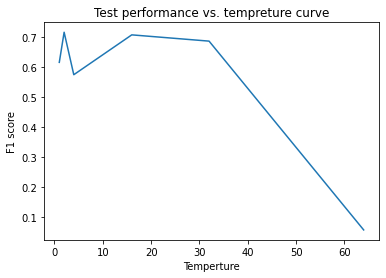

In [ ]:
#ploting Test accuracy(F1 score) vs. tempreture curve
plt.plot(temps, accuracy)
plt.title('Test performance vs. tempreture curve')
plt.xlabel('Temperture')
plt.ylabel('F1 score')
plt.show()

#Comparing the teacher and student model (number of of parameters and FLOPs)

In [ ]:
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
import numpy as np

def get_flops(model):
 
  forward_pass = tf.function(model.call,input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])
  graph_info = profile(forward_pass.get_concrete_function().graph,
                          options=ProfileOptionBuilder.float_operation())

  # The //2 is important since `profile` counts multiply and accumulate as two flops
  # We have calculated the total number of multiply accumulate ops
  flops = graph_info.total_float_ops // 2
  # Calculate no. of model parameters including trainable and non-trainable parameters
  trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
  nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
  totalParams = trainableParams + nonTrainableParams

  return flops,trainableParams,nonTrainableParams,totalParams

In [ ]:
#Calculating FLOPs and no. of parameters for the teacher model

flops_teacher,teacher_trainableParams,teacher_nonTrainableParams,teacher_totalParams = get_flops(teacher_res)
print('Flops for teacher model: {:,}'.format(flops_teacher))
print('Total Parameters for teacher model: {:,}'.format(teacher_totalParams))

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Flops for teacher model: 3,484,727,297
Total Parameters for teacher model: 23,568,898


In [ ]:
#Calculating FLOPs and no. of parameters for the student model

flops_student,student_trainableParams,student_nonTrainableParams,student_totalParams = get_flops(student_mobile)
print('Flops for student model with KD: {:,}'.format(flops_student))
print('Total Parameters for student model with KD: {:,}'.format(student_totalParams))

Flops for student model with KD: 299,496,833
Total Parameters for student model with KD: 2,260,546


# XAI method to explain models

## Saliency Map using Vanilla Gradients Explanations

In [ ]:
class SaliencyMap():
    def __init__(self, model):
        """Constructs a Vanilla Gradient Map by computing dy/dx.

        Args:
            model: The TensorFlow model used to evaluate Gradient Map.
                model takes image as input and outputs probabilities vector.
        """
        self.model = model


    def get_top_predicted_idx(self, image):
        """Outputs top predicted class for the input image.

        Args:
            img_processed: numpy image array in NHWC format, pre-processed according
                to the defined model standard.

        Returns:
            Index of the top predicted class for the input image.
        """
        preds = self.model.predict(image)
        top_pred_idx = tf.argmax(preds[0])
        return top_pred_idx


    def get_gradients(self, image):
        """Computes the gradients of outputs w.r.t input image.

        Args:
            image: numpy image array in NHWC format, pre-processed according
                to the defined model standard.

        Returns:
            Gradients of the predictions w.r.t image (same shape as input image)
        """
        image = tf.convert_to_tensor(image)
        top_pred_idx = self.get_top_predicted_idx(image)

        with tf.GradientTape() as tape:
            tape.watch(image)
            preds = self.model(image)
            top_class = preds[:, top_pred_idx]

        grads = tape.gradient(top_class, image)
        return grads


    def norm_grad(self, grad_x):
        """Normalizes gradient to the range between 0 and 1
        (for visualization purposes).

        Args:
            grad_x: numpy gradients array.

        Returns:
            Gradients of the predictions w.r.t image (same shape as input image)
        """
        abs_grads = np.abs(grad_x)
        grad_max_ = np.max(abs_grads, axis=3)[0]
        arr_min, arr_max  = np.min(grad_max_), np.max(grad_max_)
        normalized_grad = (grad_max_ - arr_min) / (arr_max - arr_min + 1e-18)
        normalized_grad = normalized_grad.reshape(1,grad_x.shape[1],grad_x.shape[2],1)

        return normalized_grad

In [ ]:
#Obtaining sample image
sample_image = test_generator[0][0]
sample_test = np.expand_dims(sample_image[0,:,:,:],axis=0)
print(sample_test.shape)

#Generating Saliency Map Explanation for Teacher Model 
S=SaliencyMap(teacher_res)
norm_gradient_squeezed_final_teacher = np.squeeze(np.squeeze(S.norm_grad(S.get_gradients(sample_test)),axis=3),axis=0)

#Generating Saliency Map Explanation for Student Model with kD
S=SaliencyMap(student_mobile)
norm_gradient_squeezed_final_student_with_KD = np.squeeze(np.squeeze(S.norm_grad(S.get_gradients(sample_test)),axis=3),axis=0)

#Generating Saliency Map Explanation for Student Model without KD 
S=SaliencyMap(mobilenet_no_kd)
norm_gradient_squeezed_final_student_without_KD = np.squeeze(np.squeeze(S.norm_grad(S.get_gradients(sample_test)),axis=3),axis=0)

(1, 224, 224, 3)


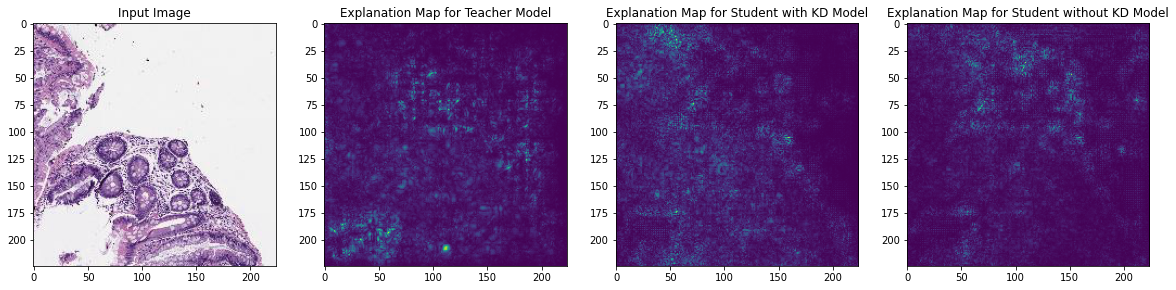

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.title('Input Image')
plt.imshow(sample_image[0,:,:,:])

plt.subplot(142)
plt.imshow(norm_gradient_squeezed_final_teacher)
plt.title('Explanation Map for Teacher Model')

plt.subplot(143)
plt.imshow(norm_gradient_squeezed_final_student_with_KD)
plt.title('Explanation Map for Student with KD Model')

plt.subplot(144)
plt.imshow(norm_gradient_squeezed_final_student_without_KD)
plt.title('Explanation Map for Student without KD Model')

plt.show()

# Implementing the state-of-the-art KD algorithm using fitnets


## Experimentation Dataset
Again dataset was loaded as we faced some OOM issues with the previous batch size. Hence, Implemented fitnets with reduced batch size of the dataset.

In [ ]:
image_table=pd.read_csv('annotations.csv') #D:/FILES/University of Toronto/Subjects/Winter 2022/Digital Image processing/Project B/Project_B_Supp/mhist_dataset/

In [ ]:
train_set=image_table.loc[image_table['Partition'] == 'train']
print(train_set.shape)

(2175, 4)


In [ ]:
test_set=image_table.loc[image_table['Partition'] == 'test']
print(test_set.shape)

(977, 4)


In [ ]:
image_dir = '/content/drive/My Drive/mhist_dataset/images'  #you should change to your directory #D:/FILES/University of Toronto/Subjects/Winter 2022/Digital Image processing/Project B/Project_B_Supp/mhist_dataset/images

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
shear_range=0.1,
rotation_range=15,
horizontal_flip=True,
vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_set,
directory=image_dir,
x_col="Image Name",
y_col="Majority Vote Label",
batch_size=24,
seed=42,
shuffle=True,
interpolation='bilinear',
class_mode="categorical",
target_size=(224, 224))

Found 489 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1686 invalid image filename(s) in x_col="Image Name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_set,
directory=image_dir,
x_col="Image Name",
y_col="Majority Vote Label",
seed=42,
class_mode='categorical',
interpolation='bilinear',
target_size=(224, 224),
batch_size=24,
shuffle=False)

Found 300 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 677 invalid image filename(s) in x_col="Image Name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


## Fitnets KD Implementation with Transfer Learning

### Model Creation with Fitnets setup

In [ ]:
resnet_fitnets=tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
)

In [ ]:
count=0
for layers in resnet_fitnets.layers:
  count+=1
  if count== 191:
    continue
  if(layers.name[0:5]== 'conv5' or layers.name[0:5]== 'post_'):
    continue
  else:
    layers.trainable=False
print(count)

191


In [ ]:
mobilenet_fitnets=tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    alpha=1.0,
    weights="imagenet",
    input_tensor=None,
    pooling='max',
)

In [ ]:
count=0
for layers in mobilenet_fitnets.layers:
  count+=1
  if count> 151:
    continue
  if(layers.name[0:8]== 'block_16' ):
    continue
  else:
    layers.trainable=False
print(count)

155


In [ ]:
#Model Creation for student baby till the guided layer
student_baby =  tf.keras.Sequential([mobilenet_fitnets,Dense(units=2048, activation='linear')])

#Model Creation for student test incorporating student baby and the rest of the layers
student_test=tf.keras.Sequential([student_baby,Dense(units=2, activation='linear')])

#Model Creation for teacher baby till the hint layer
teacher_baby =  tf.keras.Sequential([resnet_fitnets])

#Model Creation for teacher test incorporating student baby and the rest of the layers
teacher_test =  teacher_res=tf.keras.Sequential([teacher_baby,Dense(units=2, activation='linear')])                                                                

In [ ]:
teacher_baby.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
Total params: 23,564,800
Trainable params: 14,970,880
Non-trainable params: 8,593,920
_________________________________________________________________


In [ ]:
#teacher_test.build(input_shape=(None,224,224,3))
teacher_test.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 2048)              23564800  
                                                                 
 dense_5 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 14,974,978
Non-trainable params: 8,593,920
_________________________________________________________________


In [ ]:
def compute_teacher_loss_fit(images, labels):
  """Compute subclass knowledge distillation teacher loss with Fitnets setup for given images
     and labels.

  Args:
    images: Tensor representing a batch of images.
    labels: Tensor representing a batch of labels.

  Returns:
    Scalar loss Tensor.
  """
  subclass_logits = teacher_test(images, training=True)

  # Compute cross-entropy loss for subclasses.
 
  loss=tf.keras.losses.CategoricalCrossentropy(axis=-1,name='categorical_crossentropy')
  cross_entropy_loss_value = loss(labels,tf.nn.softmax(subclass_logits, axis=-1))

  return cross_entropy_loss_value

In [ ]:
def train_and_evaluate_teacher_fitnets(model, compute_loss_fn):
  """Perform training and evaluation for a given model.

  Args:
    model: Instance of tf.keras.Model.
    compute_loss_fn: A function that computes the training loss given the
      images, and labels.
  """

  # your code start from here for step 4
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  for epoch in range(1, 10 + 1):
    # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
         # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(41):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
    
  #fine tuning
  print('fine tuning')
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

  m=teacher_test.get_layer('sequential_5')
  m=m.get_layer('resnet50v2')
  count=0
  for layers in m.layers:
    count+=1
    if count== 152:
      layers.trainable=True
    if(layers.name[0:5]== 'conv4'):
      layers.trainable=True
    else:
      continue

  count=0  
  for layers in m.layers:
    count+=1
    print(layers.trainable, layers.name[0:5], count)

  for epoch in range(1, 25 + 1):
  # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(68):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
        # your code start from here for step 4

        loss_value = compute_loss_fn(images,labels)

      grads = tape.gradient(loss_value, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(41):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(model,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))

In [ ]:
train_and_evaluate_teacher_fitnets(teacher_test,compute_teacher_loss_fit)

Epoch 1: Class_accuracy: 79.32%
Epoch 2: Class_accuracy: 80.45%
Epoch 3: Class_accuracy: 83.21%
Epoch 4: Class_accuracy: 79.94%
Epoch 5: Class_accuracy: 83.01%
Epoch 6: Class_accuracy: 81.68%
Epoch 7: Class_accuracy: 80.66%
Epoch 8: Class_accuracy: 82.70%
Epoch 9: Class_accuracy: 82.70%
Epoch 10: Class_accuracy: 79.22%
fine tuning
True resne 1
Epoch 1: Class_accuracy: 82.40%
Epoch 2: Class_accuracy: 82.91%
Epoch 3: Class_accuracy: 83.52%
Epoch 4: Class_accuracy: 83.73%
Epoch 5: Class_accuracy: 84.03%
Epoch 6: Class_accuracy: 84.75%
Epoch 7: Class_accuracy: 84.75%
Epoch 8: Class_accuracy: 84.44%
Epoch 9: Class_accuracy: 84.95%
Epoch 10: Class_accuracy: 84.44%
Epoch 11: Class_accuracy: 84.54%
Epoch 12: Class_accuracy: 84.34%
Epoch 13: Class_accuracy: 84.24%
Epoch 14: Class_accuracy: 84.03%
Epoch 15: Class_accuracy: 83.52%
Epoch 16: Class_accuracy: 84.03%
Epoch 17: Class_accuracy: 84.34%
Epoch 18: Class_accuracy: 84.14%
Epoch 19: Class_accuracy: 85.36%
Epoch 20: Class_accuracy: 84.95%
Epo

In [ ]:
teacher_test.save('teacher_test')

INFO:tensorflow:Assets written to: teacher_test/assets


In [ ]:
teacher_test=keras.models.load_model('/content/drive/MyDrive/mhist_dataset/teacher_test')

OSError: ignored

In [ ]:
# Precision, Recall, and F-1 score on the test set using teacher fitnet

y_pred_o = teacher_test.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_o,axis=1)

precision_obj = tf.keras.metrics.Precision()
precision_obj.update_state(test_label, y_pred)
precision = precision_obj.result().numpy()


recall_obj = tf.keras.metrics.Recall()
recall_obj.update_state(test_label,  y_pred)
recall = recall_obj.result().numpy()


f1_score = 2*(precision*recall)/(recall+precision)
print("Evaluating the Teacher for fitnet")
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

10/10 [==============================] - 2s 253ms/step
Evaluating the Teacher for fitnet
Precision:  0.76842105
Recall:  0.71568626
F1_score:  0.7411167785873178


In [ ]:
student_test.build(input_shape=(None,224,224,3))
student_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2048)              4881472   
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 4,885,570
Trainable params: 3,513,666
Non-trainable params: 1,371,904
_________________________________________________________________


In [ ]:
student_baby.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 2048)              2623488   
                                                                 
Total params: 4,881,472
Trainable params: 3,509,568
Non-trainable params: 1,371,904
_________________________________________________________________


In [ ]:
def compute_student_loss(images, labels,teacher_baby, student_baby, ALPHA=0.9):
  """Compute subclass knowledge distillation student loss with fitnets setup for given images
     and labels.

  Args:
    images: Tensor representing a batch of images.
    labels: Tensor representing a batch of labels.
    teacher_baby: The TensorFlow teacher model with final layer as hint layer 
    student_baby: The TensorFlow student model with final layer as guided layer
    ALPHA: weight parameter to balance the contribution of two losses
  Returns:
    Scalar loss Tensor.
  """
  student_subclass_logits = student_test(images, training=True)

  # Compute subclass distillation loss between student subclass logits and
  # softened teacher subclass targets probabilities.

  teacher_subclass_logits = teacher_test(images, training=False)
  distillation_loss_value = compute_student_loss_new(teacher_baby, student_baby, images)

  # Compute cross-entropy loss with hard targets.

  loss=tf.keras.losses.CategoricalCrossentropy(axis=-1,name='categorical_crossentropy')
  cross_entropy_loss_value = loss(labels,tf.nn.softmax(student_subclass_logits, axis=-1))

  return (ALPHA*  distillation_loss_value + (1-ALPHA)* cross_entropy_loss_value) 

In [ ]:
def compute_student_loss_new(teacher_baby, student_baby, inp_imag):
  """
  Compute L2 norm of the outputs of these hint and guided layers 
  Args:
    images: Tensor representing a batch of images.
    teacher_baby: The TensorFlow teacher model with final layer as hint layer 
    student_baby: The TensorFlow student model with final layer as guided layer
    
  Returns:
    Scalar loss Tensor.
  """
    prediction_student_baby = student_baby(inp_imag)
    prediction_teacher_baby = teacher_baby(inp_imag)
    loss = tf.math.sqrt(tf.math.reduce_sum(tf.math.pow((prediction_teacher_baby-prediction_student_baby),2)))
    return loss 

In [ ]:
def train_and_evaluate_fitnets(student_test,teacher_baby,student_baby, compute_loss_fn):
  """
  Compute subclass knowledge distillation student test loss using fitnets method for the given images
     and labels. Fitnets loss is calculated as the weighted sum of the L2 norm of the outputs of these hint 
     and guided layers along with the hard labels’ cross entropy loss for the student. 

  Args:

    teacher_baby: The TensorFlow teacher model with final layer as hint layer 
    student_baby: The TensorFlow student model with final layer as guided layer
    student: The Tensorflow student model consisting of baby student followed by the classification layer 
    teacher: The TensorFlow teacher model consisting of baby teacher followed by the dropout and the classification layer
    compute_loss_fn: loss function for fitnets
  Returns:
    Prints the Epoch wise model accuracy.
  """
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  for epoch in range(1, 10 + 1):
    # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(91):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
         loss_value = compute_loss_fn(images, labels,teacher_baby, student_baby,ALPHA=0.8)
      grads = tape.gradient(loss_value, student_test.trainable_variables)
      optimizer.apply_gradients(zip(grads, student_test.trainable_variables))

    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(41):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(student_test,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))
  
  #fine tuning
  print('fine tuning')
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

  m=student_test.get_layer('sequential_3')
  m=m.get_layer('mobilenetv2_1.00_224')

  for layers in m.layers:
    if(layers.name[0:8]== 'block_15'):
      layers.trainable=True
    else:
      continue

  count=0  
  for layers in m.layers:
    count+=1
    print(layers.trainable, layers.name[0:8], count)

  for epoch in range(1, 25 + 1):
  # Run training.
    print('Epoch {}: '.format(epoch), end='')
    train_generator.reset()
    for _ in range(91):
      images, labels=train_generator.next()
      with tf.GradientTape() as tape:
        # your code start from here for step 4

        loss_value = compute_loss_fn(images, labels,teacher_baby, student_baby,ALPHA=0.8)

      grads = tape.gradient(loss_value, student_test.trainable_variables)
      optimizer.apply_gradients(zip(grads, student_test.trainable_variables))
    
    # Run evaluation.
    num_correct = 0
    num_total = 0
    for _ in range(41):
      # your code start from here for step 4
      images, labels=test_generator.next()
      num_total+= len(labels)
      num_correct += compute_num_correct(student_test,images,labels)[0] 
    print("Class_accuracy: " + '{:.2f}%'.format(
        num_correct / num_total * 100))

In [ ]:
#Calculating student loss with the Fitnets setup
train_and_evaluate_fitnets(student_test,teacher_baby,student_baby, compute_student_loss)

Epoch 1: Class_accuracy: 62.03%
Epoch 2: Class_accuracy: 54.11%
Epoch 3: Class_accuracy: 32.91%
Epoch 4: Class_accuracy: 37.34%
Epoch 5: Class_accuracy: 62.39%
Epoch 6: Class_accuracy: 58.12%
Epoch 7: Class_accuracy: 66.88%
Epoch 8: Class_accuracy: 70.78%
Epoch 9: Class_accuracy: 73.84%
Epoch 10: Class_accuracy: 76.05%
fine tuning
False input_5 1
False Conv1 2
False bn_Conv1 3
False Conv1_re 4
False expanded 5
False expanded 6
False expanded 7
False expanded 8
False expanded 9
False block_1_ 10
False block_1_ 11
False block_1_ 12
False block_1_ 13
False block_1_ 14
False block_1_ 15
False block_1_ 16
False block_1_ 17
False block_1_ 18
False block_2_ 19
False block_2_ 20
False block_2_ 21
False block_2_ 22
False block_2_ 23
False block_2_ 24
False block_2_ 25
False block_2_ 26
False block_2_ 27
False block_3_ 28
False block_3_ 29
False block_3_ 30
False block_3_ 31
False block_3_ 32
False block_3_ 33
False block_3_ 34
False block_3_ 35
False block_3_ 36
False block_4_ 37
False block_4_

In [ ]:
# Precision, Recall, and F-1 score on the test set using student fitnet model with KD

y_pred_o = student_test.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_o,axis=1)

precision_obj = tf.keras.metrics.Precision()
precision_obj.update_state(test_label, y_pred)
precision = precision_obj.result().numpy()


recall_obj = tf.keras.metrics.Recall()
recall_obj.update_state(test_label,  y_pred)
recall = recall_obj.result().numpy()


f1_score = 2*(precision*recall)/(recall+precision)
print("Evaluating the student fitnet")
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

10/10 [==============================] - 2s 178ms/step
Evaluating the student fitnet
Precision:  0.7111111
Recall:  0.627451
F1_score:  0.6666666666666666
